## **Name: Kagabo Faustin**

### **Assignment 2 MAP6014 report**

*link for the code : https://github.com/kagabof/regression/blob/main/Travail-2-MAP6014.ipynb*

----

## **Part 1: Comparison of Congruential Generators**

### **1. Using linear congruential generator wih the parameter:**
a = 387
b = 250
m = 1000

Linear congruential generator (LCG) function: $X_{n+1} = (aX_{n} + b) \mod m$

Replace with values: $X_{n+1} = (387X_{n} + 250) \mod 1000$

###  **2. Use it the LCG function $X_{n+1} = (387X_{n} + 250) \mod 1000$ by generating 10 random values**

### **3.** Using linear congruential generator wih the parameter:
a = 257
b = 120
m = 5000

Linear congruential generator (LCG) function: $X_{n+1} = (aX_{n} + b) \mod m$

Replace with values: $X_{n+1} = (257{n} + 120) \mod 5000$

### **4.**  Use the LCG function $X_{n+1} = (257{n} + 120) \mod 5000$ to get random values

### **5.** For each congruential generator, measure:
  a. Execution speed.

  b. Uniformity using the Kolmogorov-Smirnov (KS) test with the ks.test() function in R.
  
  c. First-order serial correlation (correlation between one element and the next).

  The following code are functions to generate random values with Execution speed,  Kolmogorov-Smirnov, First-order serial correlation

In [41]:
import numpy as np
from scipy import stats
from datetime import datetime

def linear_congruential_generator(seed, a, b, m, n):
  next_seed = seed
  arr = []
  for _ in range(n):
    next_seed = ((a*next_seed) + b) % m
    arr.append(next_seed)
  return np.array(arr)


def linear_congruential_generator_with_tests(
  seed, a, b, m, n, print_text:bool=True):
  start_time = datetime.now()
  values = linear_congruential_generator(seed, a, b, m, n)
  end_time = datetime.now()
  speed = end_time - start_time

  ks_stat, ks_p_value = stats.kstest(values / m, 'uniform')
  correlation = np.corrcoef(values[:-1], values[1:])[0, 1]

  if print_text:
    print('Speed: ', speed)
    print('Generated random values: ', values[:100])
    print('Kolmogorov-Smirnov (KS): ', ks_stat)
    print('ks_p_value: ', ks_p_value)
    print(f'First-order serial correlation with the\
      first and the second values: {correlation:.6f}')


  period = None
  for index, i in enumerate(values[1:]):
    if index != 0 and \
      (np.array(values[:index+1]) == np.array(
        values[index:index*2 + 1])).all():
      if print_text:
        print('Period: ', index)
      period = index
      break

  alpha = 0.05
  if print_text:
    if ks_p_value > alpha:
      print("The following values follow the some distributions")
    else:
      print("The following values does not\
        follow the some distributions")
  return values, ks_stat, ks_p_value, correlation, speed, period

For $X_{n+1} = (387X_{n} + 250) \mod 1000$ and use different seed

In [42]:
a = 387
b = 250
m = 1000
seed = 11
n = 500
values, _, _, _, _, _ = \
  linear_congruential_generator_with_tests(seed, a, b, m, n)

print("\n", "x" * 50, end='\n\n')

seed = 48
values, _, _, _, _, _ = \
  linear_congruential_generator_with_tests(seed, a, b, m, n)

Speed:  0:00:00.000144
Generated random values:  [507 459 883 971  27 699 763 531 747 339 443 691 667 379 923 451 787 819
 203 811 107 659 283 771 627 899 163 331 347 539 843 491 267 579 323 251
 387  19 603 611 707 859 683 571 227  99 563 131 947 739 243 291 867 779
 723  51 987 219   3 411 307  59  83 371 827 299 963 931 547 939 643  91
 467 979 123 851 587 419 403 211 907 259 483 171 427 499 363 731 147 139
  43 891  67 179 523 651 187 619 803  11]
Kolmogorov-Smirnov (KS):  0.013000000000000012
ks_p_value:  0.9999924221696703
First-order serial correlation with the first and the second values: -0.096193
Period:  100
The following values follow the some distributions

 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Speed:  0:00:00.000137
Generated random values:  [826 912 194 328 186 232  34 408 146 752 274 288 706 472 914 968 866 392
 954 448 626 512 394 728 986 832 234 808 946 352 474 688 506  72 114 368
 666 992 154 848 426 112 594 128 786 432 434 208 746 952 674  88 306 672


For $X_{n+1} = (257{n} + 120) \mod 5000$ and use different seed

In [43]:
a = 257
b = 120
m = 5000
seed = 11

n = 500
_ = linear_congruential_generator_with_tests(seed, a, b, m, n)

print("\n", "x" * 50, end='\n\n')

seed = 48
_ = linear_congruential_generator_with_tests(seed, a, b, m, n)

Speed:  0:00:00.000142
Generated random values:  [2947 2499 2363 2411 4747   99  563 4811 1547 2699 3763 2211 3347  299
 1963 4611  147 2899  163 2011 1947  499 3363 4411 3747 3099 1563 1811
  547  699 4763 4211 2347 3299 2963 1611 4147  899 1163 4011  947 3499
 4363 1411 2747 1099 2563 3811 4547 3699  763 1211 1347 1299 3963 3611
 3147 3899 2163 1011 4947 1499  363 3411 1747 4099 3563  811 3547 1699
 1763 3211  347 4299 4963  611 2147 1899 3163 3011 3947 4499 1363  411
  747 2099 4563 2811 2547 4699 2763  211 4347 2299  963 2611 1147 4899
 4163   11]
Kolmogorov-Smirnov (KS):  0.009800000000000031
ks_p_value:  0.9999999996409931
First-order serial correlation with the first and the second values: -0.106059
Period:  100
The following values follow the some distributions

 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Speed:  0:00:00.000138
Generated random values:  [2456 1312 2304 2248 2856 4112 1904 4448 3256 1912 1504 1648 3656 4712
 1104 3848 4056 2512  704 1048 4456  312  304 

___

## **Part 2: Influence of the "Seed"**

### **1. Using linear congruential generator wih the parameter:**

a = 387
b = 250
m = 1000

Linear congruential generator (LCG) function: $X_{n+1} = (aX_{n} + b) \mod m$

Replace with values: $X_{n+1} = (387X_{n} + 250) \mod 1000$

###  **2. Use it the LCG function $X_{n+1} = (387X_{n} + 250) \mod 1000$ by generating 100 random values with different seed (starting point)**
**a.** seed: 123, 456, 789


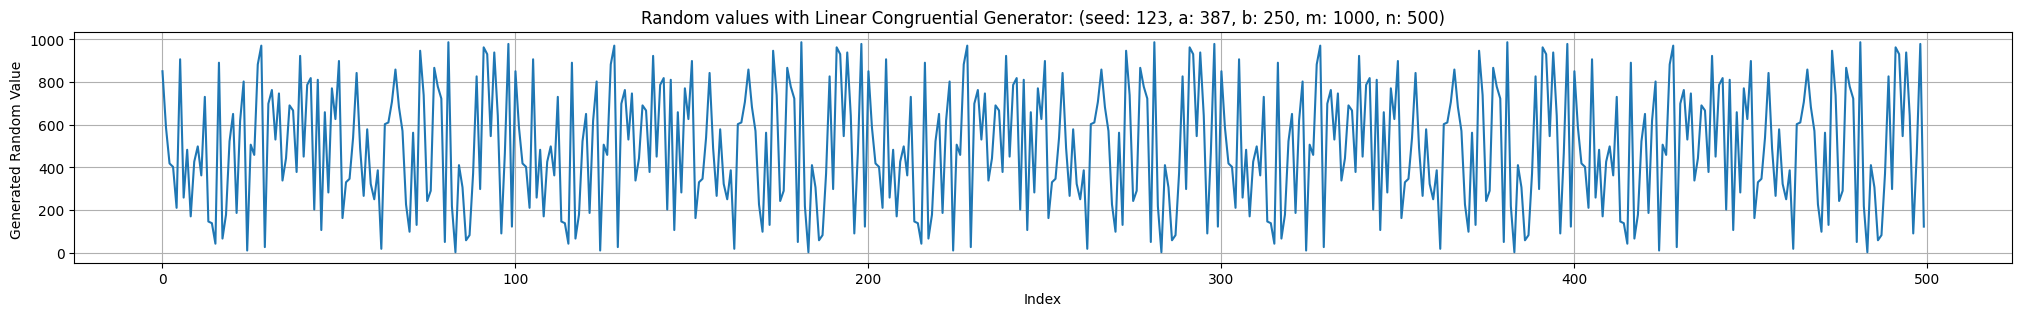

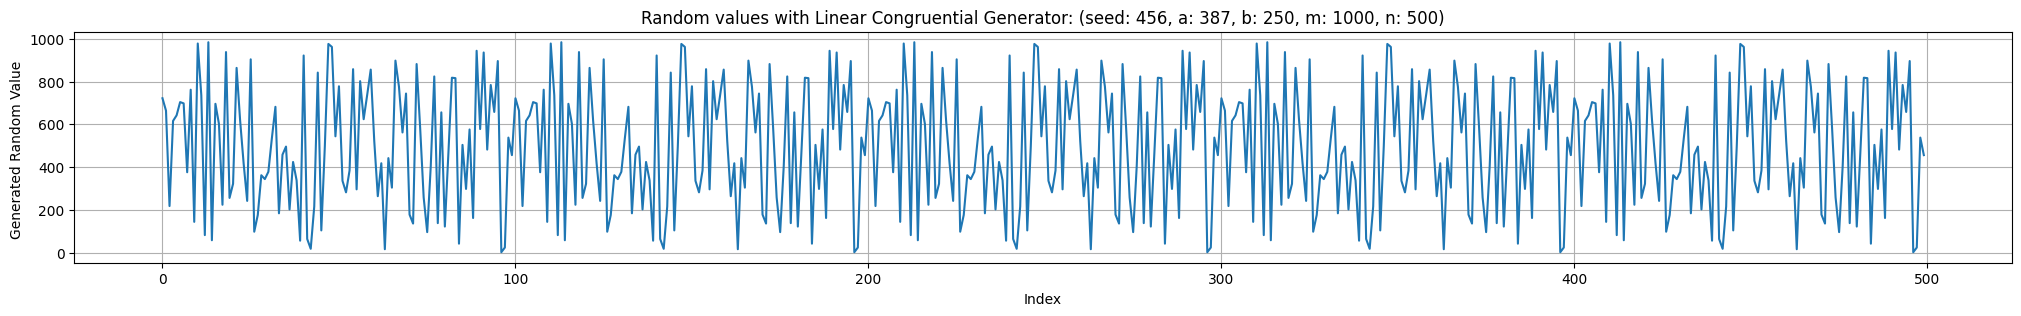

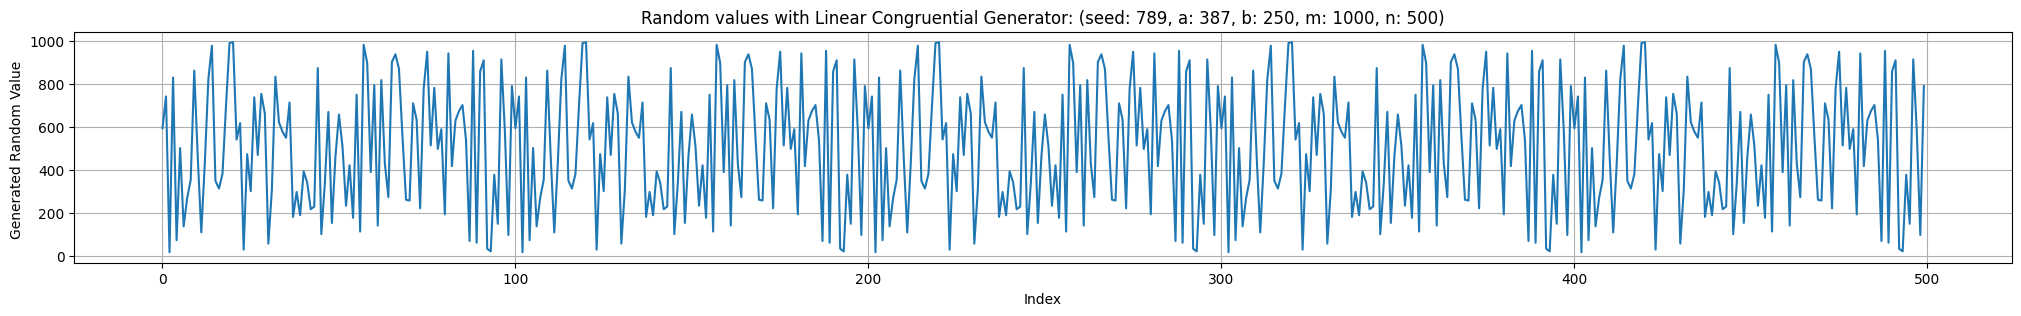

In [44]:
import matplotlib.pyplot as plt

def linear_congruential_generator_with_tests_graph(seed, a, b, m, n):
  values, ks_stat, ks_p_value, correlation, speed, period = \
    linear_congruential_generator_with_tests(
      seed, a, b, m, n, print_text=False)
  plt.figure(figsize=(25, 3))
  plt.plot(values)
  plt.title('Random values with Linear Congruential Generator: ' +
    f"(seed: {seed}, a: {a}, b: {b}, m: {m}, n: {n})")
  plt.xlabel("Index")
  plt.ylabel("Generated Random Value ")
  plt.grid(True)
  plt.show()
  
  return values, ks_stat, ks_p_value, correlation, speed, period


results_a  = []
for start in (123, 456, 789):
  a, b, m, seed  = 387, 250, 1000, start
  n = 500
  values, ks_stat, ks_p_value, correlation, speed, period = \
    linear_congruential_generator_with_tests_graph(seed, a, b, m, n)

  results_a.append(
    ((a, b, m, seed), ks_stat, ks_p_value, correlation, speed, period))

### **3.** Using linear congruential generator wih the parameter:
a = 257
b = 120
m = 5000

Linear congruential generator (LCG) function: $X_{n+1} = (aX_{n} + b) \mod m$

Replace with values: $X_{n+1} = (257{n} + 120) \mod 5000$

### **4.**  Use it the LCG function $X_{n+1} = (257{n} + 120) \mod 5000$ by generating 100 random values with different seed (starting point)
 
**seed.** 111, 222, 333

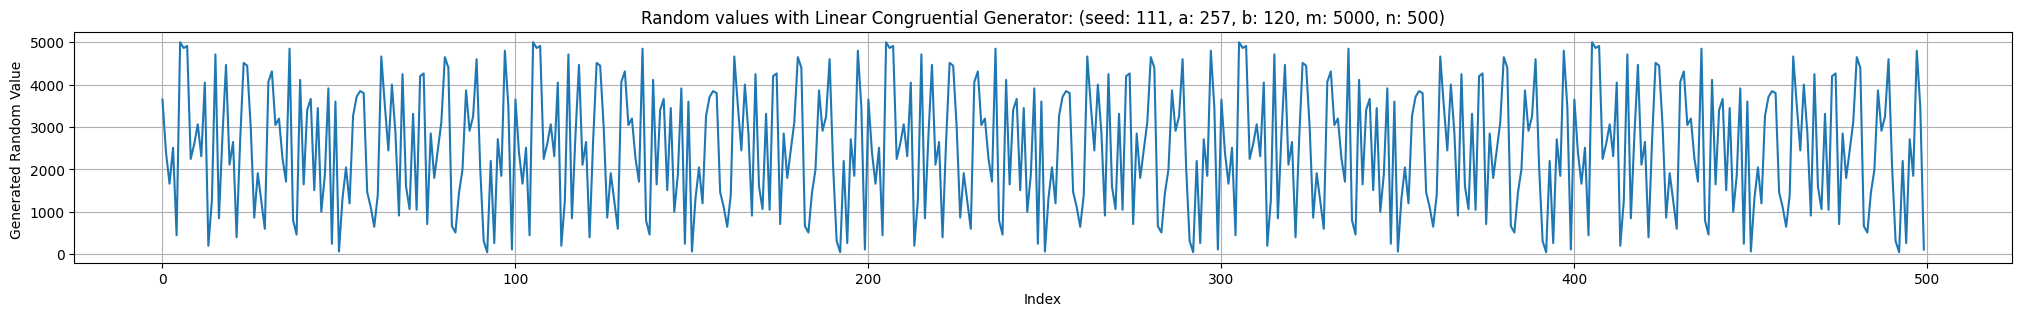

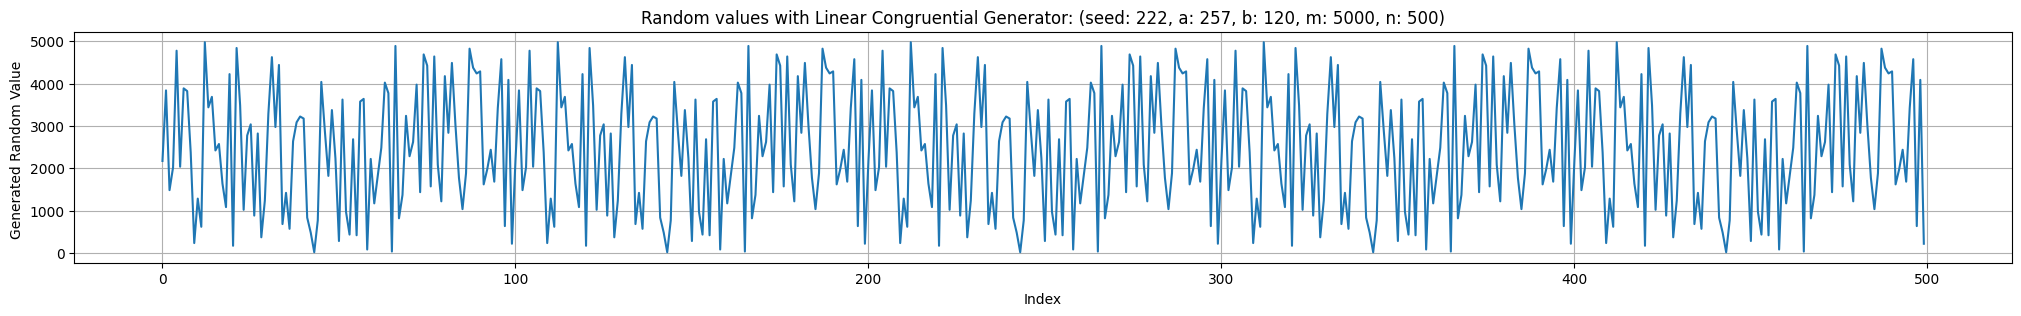

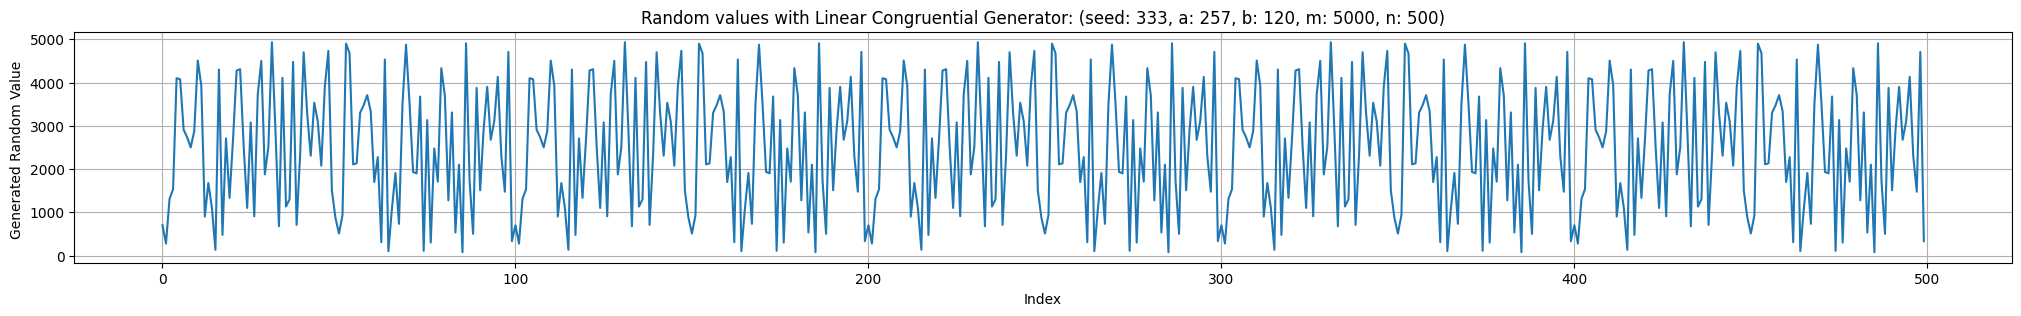

In [45]:
results_b  = []
for start in (111, 222, 333):
  a, b, m, seed  = 257, 120, 5000, start
  n = 500
  values, ks_stat, ks_p_value, correlation, speed, period = \
    linear_congruential_generator_with_tests_graph(seed, a, b, m, n)

  results_b.append(
    ((a, b, m, seed), ks_stat, ks_p_value, correlation, speed, period))

#### **Comparing the statistical results (execution speed, KS test, serial correlation) obtained with different initial values ("seeds") for both congruential generators.**

$X_{n+1} = (387X_{n} + 250) \mod 1000$ and $X_{n+1} = (257{n} + 120) \mod 5000$

by using primary array size of 500 units for each combination

In [46]:
# First algorithm results
params = results_a[0][0]
print(f"Generator {(params[0], params[1], params[2])}: \n")
for (_, _, _, seed), ks_stat, ks_p_value, correlation, speed, period in \
  results_a[:1]:
  print(f"\tSeed {seed}: KS Statistic = {ks_stat:.10f},\
    ks_p_value: {ks_p_value:.10f},\
    Correlation = {correlation:.10f}, period = {period}, speed = {speed}")

# First algorithm results
params_b = results_b[0][0]
print(f"\nGenerator {(params_b[0], params_b[1], params_b[2])}: \n")
for (_, _, _, seed), ks_stat, ks_p_value, correlation, speed, period in \
  results_b[:1]:
  print(f"\tSeed {seed}: KS Statistic = {ks_stat:.10f},\
    ks_p_value: {ks_p_value:.10f},\
    Correlation = {correlation:.10f}, period = {period}, speed = {speed}")

Generator (387, 250, 1000): 

	Seed 123: KS Statistic = 0.0130000000,    ks_p_value: 0.9999924222,    Correlation = -0.0931719083, period = 100, speed = 0:00:00.000139

Generator (257, 120, 5000): 

	Seed 111: KS Statistic = 0.0098000000,    ks_p_value: 0.9999999996,    Correlation = 0.0158823574, period = 100, speed = 0:00:00.000105


**Observation:**

  **6.** by using the above result for the two generator let Compare the statistical results (execution speed, KS test, serial correlation) obtained with different initial values ("seeds") for both congruential generators.

  1. $X_{n+1} = (387X_{n} + 250) \mod 1000$ with seed 123 and array size of 500 units
  2. $X_{n+1} = (257{n} + 120) \mod 5000$ with seed 111 and array size of 500 units

  - All algorithms have a normal distribution and because the ks-p value is mare than 0.05

  - KS statistic indicate how close the it is to uniform distribution. The lower KS statistic is the better the generator algorithm is. in thi regards the congruential generator 2 which have KS Statistic = 0.0098000000 is better than generator 1 with seed 123 which have KS Statistic = 0.0130000000

  - The higher KS p-value is the better the algorithm is with a better uniform distribution. This mean that the congruential generator 2 which have ks_p_value: 0.9999999996 is sightly better than generator 1 with seed 123 which have ks_p_value: 0.9999924222.

  - The congruential generator 2 have a serial corelation = 0.0158823574 is better than generator 1 which have -0.0931719083. A serial correlation close to zero is better in ore case is generator 2.

  - With 500 units and seed given, the above algorithms have the some period which is 100. This mean that the sequence can only be repeated in the 100th unit.

  - Both algorithm have similar speed for generating numbers

  ___


In [47]:
# First algorithm results
params = results_a[0][0]
print(f"Generator {(params[0], params[1], params[2])}: \n")
for (_, _, _, seed), ks_stat, ks_p_value, correlation, speed, period in \
  results_a:
  print(f"\tSeed {seed}: KS Statistic = {ks_stat:.10f},\
    ks_p_value: {ks_p_value:.10f},\
    Correlation = {correlation:.10f}, period = {period}, speed = {speed}")

# First algorithm results
params_b = results_b[0][0]
print(f"\nGenerator {(params_b[0], params_b[1], params_b[2])}: \n")
for (_, _, _, seed), ks_stat, ks_p_value, correlation, speed, period in \
  results_b:
  print(f"\tSeed {seed}: KS Statistic = {ks_stat:.10f},\
    ks_p_value: {ks_p_value:.10f},\
    Correlation = {correlation:.10f}, period = {period}, speed = {speed}")

Generator (387, 250, 1000): 

	Seed 123: KS Statistic = 0.0130000000,    ks_p_value: 0.9999924222,    Correlation = -0.0931719083, period = 100, speed = 0:00:00.000139
	Seed 456: KS Statistic = 0.0160000000,    ks_p_value: 0.9993511079,    Correlation = -0.1298764695, period = 100, speed = 0:00:00.000150
	Seed 789: KS Statistic = 0.0170000000,    ks_p_value: 0.9982696688,    Correlation = -0.0871913759, period = 100, speed = 0:00:00.000119

Generator (257, 120, 5000): 

	Seed 111: KS Statistic = 0.0098000000,    ks_p_value: 0.9999999996,    Correlation = 0.0158823574, period = 100, speed = 0:00:00.000105
	Seed 222: KS Statistic = 0.0128000000,    ks_p_value: 0.9999949879,    Correlation = -0.0547972572, period = 100, speed = 0:00:00.000116
	Seed 333: KS Statistic = 0.0154000000,    ks_p_value: 0.9996726958,    Correlation = -0.0423913303, period = 100, speed = 0:00:00.000117


**Observation:**

**7.** Analyze if the choice of the "seed" has a significant influence on the results

- As the seed value increases the KS Statistic also increases on both algorithm

- As the seed value increases the ks_p_value also decreases on both algorithm

- With the seed used on both algorithm The Period and speed is not influenced

___

## **Part 3:  Normal Distribution, Simulation, and the Law of Large Numbers**

In [48]:
import numpy as np

def average_estimate_of_quantal(
    simulations_number:int, samples_number:int, quantal_number:int):
    """Calculate the average estimate using the law of large numbers
    Args:
        simulations_number (int): number of simulations
        samples_number: number of samples per simulation
        quantal_number: quantal number
    Returns:
        estimated minimum value of the quantal
    """
    quantal_estimates = [
        np.percentile(
            np.random.standard_normal(samples_number), quantal_number
            ) for _ in range(simulations_number)
        ]

    return np.mean(quantal_estimates)

print("Estimated z_0.10:", average_estimate_of_quantal(
    simulations_number=10000, samples_number=1000, quantal_number=10))

Estimated z_0.10: -1.279847408534229


**Observations:**

- The estimated z_0.10 (0.10 quantal level) is  -1.2781767030530282 as observed above.

- From the standard normal distribution, this means that 10% is the change to have a value less than -1.2781767030530282.

- The more we more sample we use the more accurate se sample is. In our case we used the sample number is 1000.



